In [7]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install lightgbm



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install mplleaflet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For visualisation
import seaborn as sns
import matplotlib.pyplot as plt 
import folium

#For getting date part
from datetime import datetime, timedelta

#For model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#For LightGBM
from lightgbm import LGBMClassifier
import mplleaflet

In [5]:
# reading the dataset

df_base = pd.read_csv("C:\\Users\\Gireeswar\\Documents\\MiniProject\\train.csv")

# check the shape of the data
df_base.shape

(878049, 9)

In [13]:
df_base.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13-05-2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13-05-2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13-05-2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13-05-2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13-05-2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [15]:
df_base.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'LARCENY/THEFT'),
  Text(1, 0, 'OTHER OFFENSES'),
  Text(2, 0, 'NON-CRIMINAL'),
  Text(3, 0, 'ASSAULT'),
  Text(4, 0, 'DRUG/NARCOTIC'),
  Text(5, 0, 'VEHICLE THEFT'),
  Text(6, 0, 'VANDALISM'),
  Text(7, 0, 'WARRANTS'),
  Text(8, 0, 'BURGLARY'),
  Text(9, 0, 'SUSPICIOUS OCC'),
  Text(10, 0, 'MISSING PERSON'),
  Text(11, 0, 'ROBBERY'),
  Text(12, 0, 'FRAUD'),
  Text(13, 0, 'FORGERY/COUNTERFEITING'),
  Text(14, 0, 'SECONDARY CODES'),
  Text(15, 0, 'WEAPON LAWS'),
  Text(16, 0, 'PROSTITUTION'),
  Text(17, 0, 'TRESPASS'),
  Text(18, 0, 'STOLEN PROPERTY'),
  Text(19, 0, 'SEX OFFENSES FORCIBLE'),
  Text(20, 0, 'DISORDERLY CONDUCT'),
  Text(21, 0, 'DRUNKENNESS'),
  Text(22, 0, 'RECOVERED VEHICLE'),
  Text(23, 0, 'KIDNAPPING'),
  Text(24, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(25, 0, 'RUNAWAY'),
  T

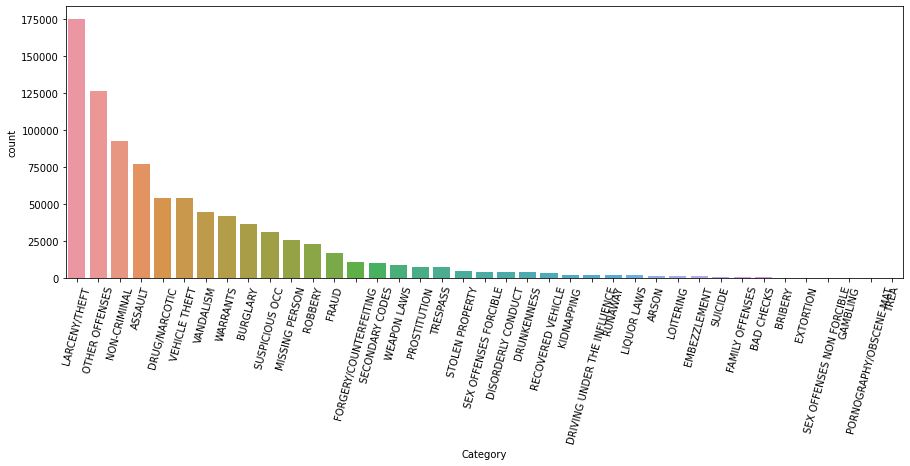

In [3]:
# print the value counts of the categories
plt.figure(figsize=(15,5))
sns.countplot(x = df_base['Category'], orient='v', order = df_base['Category'].value_counts().index)
plt.xticks(rotation=75)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

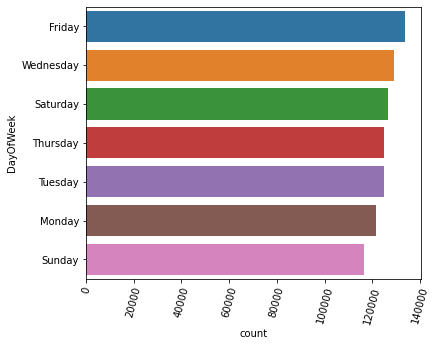

In [17]:
# Print Value Counts per Weekday

plt.figure(figsize=(6,5))
sns.countplot(y = df_base['DayOfWeek'], orient='h', order = df_base['DayOfWeek'].value_counts().index)
plt.xticks(rotation=75)

<Figure size 1152x720 with 0 Axes>

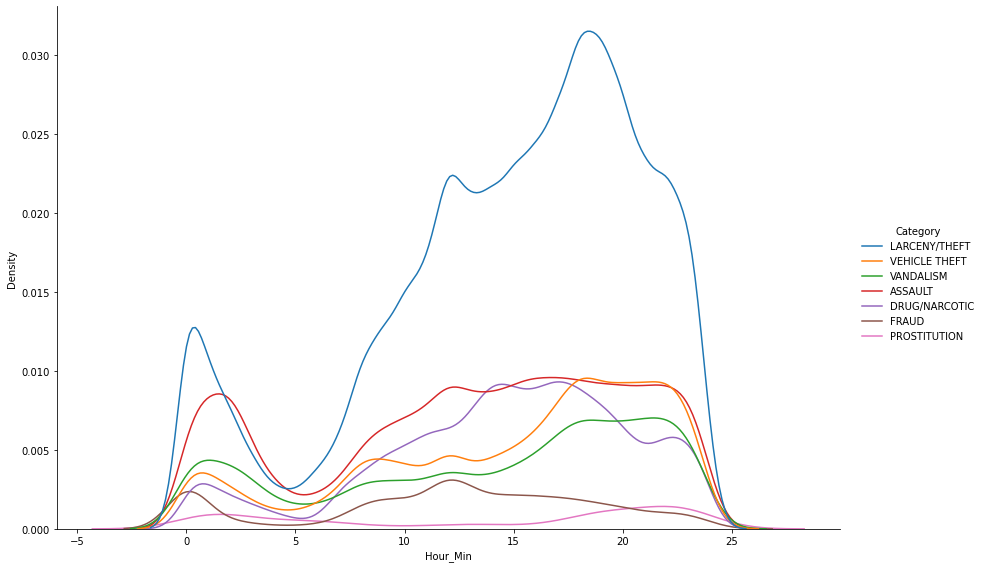

<Figure size 1152x720 with 0 Axes>

In [18]:
# Convert the time to minutes
df_base['Hour_Min'] = pd.to_datetime(df_base['Dates']).dt.hour  + pd.to_datetime(df_base['Dates']).dt.minute / 60

# Print Crime Counts per Time and Category
df_base_filtered = df_base[df_base['Category'].isin([
    'PROSTITUTION', 
    'VEHICLE THEFT', 
    'DRUG/NARCOTIC', 
    'WARRENTS', 
    'BURGLERY', 
    'FRAUD', 
    'ASSAULT',
    'LARCENY/THEFT',
    'VANDALISM'])]

sns.displot(x = 'Hour_Min', hue="Category", data = df_base_filtered, kind="kde", height=8, aspect=1.5)
plt.figure(figsize=(16,10))

In [19]:
# let's explore what information we can extract from the streetnames
for i in df_base['Address'][0:10]:
    print(i)

OAK ST / LAGUNA ST
OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST


In [4]:
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi

def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    df = pd.get_dummies(dfx[['DayOfWeek' , 'PdDistrict']])
    df['Hour_Min'] = pd.to_datetime(dfx['Dates']).dt.hour + pd.to_datetime(dfx['Dates']).dt.hour/60
    df['Day'] = pd.to_datetime(dfx['Dates']).dt.day
    df['Month'] = pd.to_datetime(dfx['Dates']).dt.month
    df['Year'] = pd.to_datetime(dfx['Dates']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['Dates']).dt.month, prefix='Month')
    df = pd.concat([df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Carthesian Coordinates to Polar Coordinates
    df[['X', 'Y']] = dfx[['X', 'Y']]
    df['dist'], df['phi'] = cart2polar(df['X'], df['Y'])
  
    # Extracting Street Types
    df['Is_ST'] = dfx['Address'].str.contains(" ST", case=True)
    df['Is_AV'] = dfx['Address'].str.contains(" AV", case=True)
    df['Is_WY'] = dfx['Address'].str.contains(" WY", case=True)
    df['Is_TR'] = dfx['Address'].str.contains(" TR", case=True)
    df['Is_DR'] = dfx['Address'].str.contains(" DR", case=True)
    df['Is_Block'] = dfx['Address'].str.contains(" Block", case=True)
    df['Is_crossing'] = dfx['Address'].str.contains(" / ", case=True)
    
    return df

# Processing Function for Labels
def encodeLabels(dfx):
    df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['Category'])
    return factor

# Remove Outliers by Longitude
df_cleaned = df_base[df_base['Y'] < 70]

# Encode Labels as Integer
factor = encodeLabels(df_cleaned)
y_df = factor[0]
labels = list(factor[1])
# for val, i in enumerate(labels):
#   print(val, i)

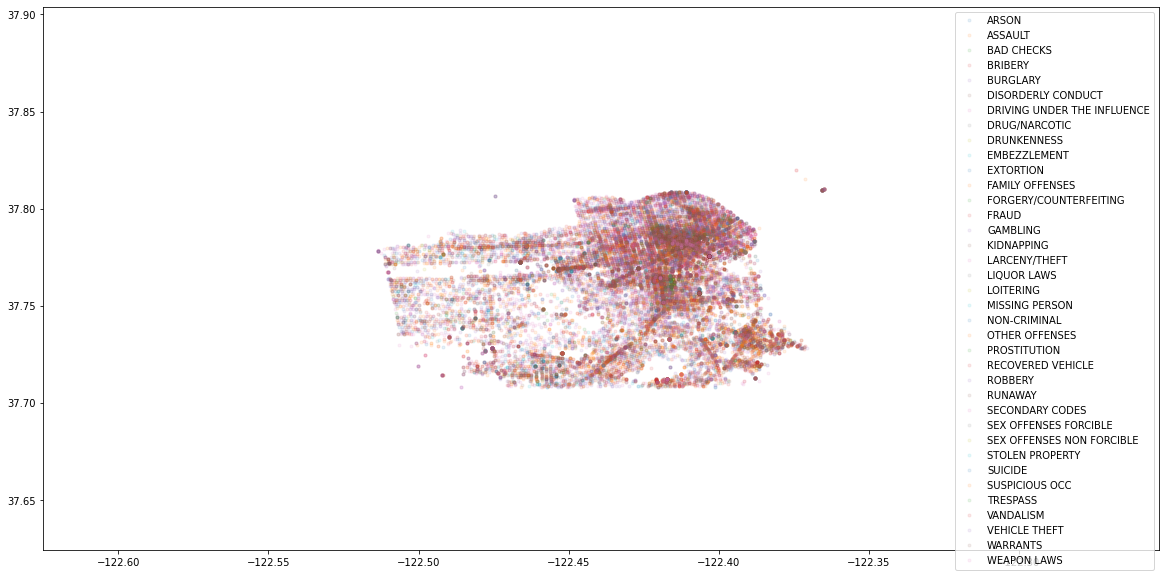

In [21]:
# Plot Criminal Activities by Lat and Long
df_filtered = df_cleaned.sample(frac=0.05)  
#df_filtered = df_cleaned[df_cleaned['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT', 'FRAUD'])].sample(frac=0.05) # to filter 

groups = df_filtered.groupby('Category')

fig, ax = plt.subplots(sharex=False, figsize=(20, 10))
ax.margins(0.75) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['X'], group['Y'], marker='.', linestyle='', label=name, alpha=0.1)
ax.legend()
plt.show()

In [5]:
# Create train_df & test_df
x_df = preprocessFeatures(df_cleaned).copy()

# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)
x_train

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,Y,dist,phi,Is_ST,Is_AV,Is_WY,Is_TR,Is_DR,Is_Block,Is_crossing
276998,0,0,0,0,0,1,0,0,0,0,...,37.785023,128.110900,2.842200,True,False,False,False,False,True,False
81579,0,0,0,0,0,1,0,0,0,0,...,37.748470,128.185052,2.842677,False,True,False,False,False,True,False
206676,0,0,0,1,0,0,0,0,0,0,...,37.762744,128.113657,2.842389,True,False,False,False,False,True,False
732006,0,0,0,0,0,0,1,0,0,0,...,37.784140,128.109653,2.842204,True,False,False,False,False,False,True
796194,1,0,0,0,0,0,0,0,0,0,...,37.791333,128.125982,2.842185,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0,1,0,0,0,0,0,0,0,0,...,37.785745,128.105231,2.842180,True,False,False,False,False,False,True
152315,0,0,0,1,0,0,0,0,0,0,...,37.783386,128.108378,2.842207,True,False,False,False,False,True,False
117952,0,0,0,0,0,1,0,0,0,0,...,37.783053,128.109942,2.842214,True,False,False,False,False,True,False
435829,0,0,0,1,0,0,0,0,0,0,...,37.786565,128.106822,2.842178,True,False,False,False,False,True,False


In [6]:
print(len(x_train),len(y_train))

614587 614587


In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614587 entries, 276998 to 305711
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DayOfWeek_Friday       614587 non-null  uint8  
 1   DayOfWeek_Monday       614587 non-null  uint8  
 2   DayOfWeek_Saturday     614587 non-null  uint8  
 3   DayOfWeek_Sunday       614587 non-null  uint8  
 4   DayOfWeek_Thursday     614587 non-null  uint8  
 5   DayOfWeek_Tuesday      614587 non-null  uint8  
 6   DayOfWeek_Wednesday    614587 non-null  uint8  
 7   PdDistrict_BAYVIEW     614587 non-null  uint8  
 8   PdDistrict_CENTRAL     614587 non-null  uint8  
 9   PdDistrict_INGLESIDE   614587 non-null  uint8  
 10  PdDistrict_MISSION     614587 non-null  uint8  
 11  PdDistrict_NORTHERN    614587 non-null  uint8  
 12  PdDistrict_PARK        614587 non-null  uint8  
 13  PdDistrict_RICHMOND    614587 non-null  uint8  
 14  PdDistrict_SOUTHERN    614587 n

In [25]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263395 entries, 564342 to 348593
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DayOfWeek_Friday       263395 non-null  uint8  
 1   DayOfWeek_Monday       263395 non-null  uint8  
 2   DayOfWeek_Saturday     263395 non-null  uint8  
 3   DayOfWeek_Sunday       263395 non-null  uint8  
 4   DayOfWeek_Thursday     263395 non-null  uint8  
 5   DayOfWeek_Tuesday      263395 non-null  uint8  
 6   DayOfWeek_Wednesday    263395 non-null  uint8  
 7   PdDistrict_BAYVIEW     263395 non-null  uint8  
 8   PdDistrict_CENTRAL     263395 non-null  uint8  
 9   PdDistrict_INGLESIDE   263395 non-null  uint8  
 10  PdDistrict_MISSION     263395 non-null  uint8  
 11  PdDistrict_NORTHERN    263395 non-null  uint8  
 12  PdDistrict_PARK        263395 non-null  uint8  
 13  PdDistrict_RICHMOND    263395 non-null  uint8  
 14  PdDistrict_SOUTHERN    263395 n

In [7]:

import lightgbm as ltb

#dtrain = xgb.DMatirx(x_train)
#dtest = xgb.DMatrix()

In [18]:

# Configure the LightGBM model
param = {'booster': 'gbtree', 
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor',
         'max_depth': 70, 
         'eta': 0.15, 
         'objective': '{multi:softmax}', 
         'eval_metric': 'rmse', #e.g., rmse, rmsle, auc, mae, mlogloss
         'num_round': 100,
         'feature_selector ': 'greedy', #cyclic, greedy, shuffle, random, thrifty
         'sampling_method': 'gradient_based'
}
ltb_clf = LGBMClassifier(**param)
ltb_clf.fit(x_train, y_train.ravel())
score = ltb_clf.score(x_test, y_test.ravel())
print(score)

# Create predictions on the test dataset
y_pred = ltb_clf.predict(x_test)

# Print a classification report
results_log = classification_report(y_test, y_pred)
print(results_log)


c:\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Python\Python310\lib\site-packages\lightgbm\basic.py:1487: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: feature_selector
[LightGBM] [Warning] Unknown parameter: greedy
[LightGBM] [Warning] Unknown parameter: sampling_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] num_iterations is set=100, num_round=100 will be ignored. Current value: num_iterations=100
0.24426811442889956
              precision    recall  f1-score   support

           0       0.09      0.02      0.03     12657
           1       0.26      0.27      0.27     37898
           2       0.28      0.65      0.39     52237
           3       0.22      0.20      0.21     16136
           4       0.10      0.01      0.03     13426
           5       0.21      0.12      0.15     27798
           6       0

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

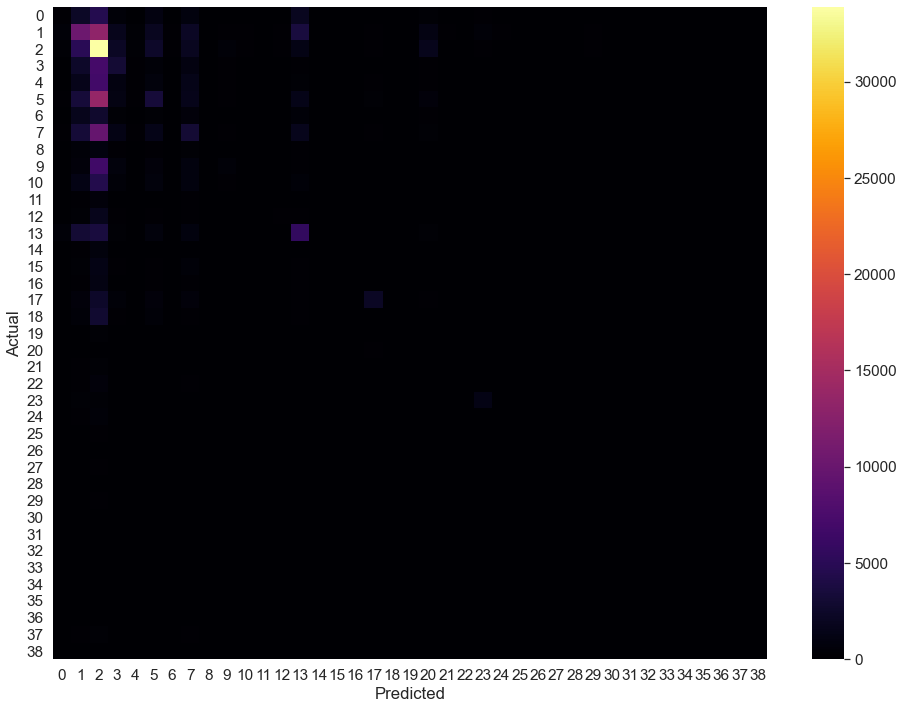

In [19]:
# Print a multi-Class Confusion Matrix
cnf_matrix = confusion_matrix(y_test.reshape(-1), y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=False, fmt='.0f')#, annot_kws={"size": 13})